# TASK-3:  CLUSTERING ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
import pandas as pd
import numpy as np

# Generate dummy data
np.random.seed(42)
n_customers = 200

df = pd.DataFrame({
    'Customer ID': range(1, n_customers + 1),
    'Age': np.random.randint(18, 70, size=n_customers),
    'Annual Income': np.random.randint(15000, 100000, size=n_customers),
    'Spending Score': np.random.randint(1, 100, size=n_customers)
})

# Save it as a CSV file in your working directory
df.to_csv("customer_data.csv", index=False)
print("customer_data.csv file created successfully!")


customer_data.csv file created successfully!


In [6]:
df = pd.read_csv("customer_data.csv")

In [7]:
df.head()

,Customer ID,Age,Annual Income,Spending Score
0,1,56,73053,58
1,2,69,36959,86
2,3,46,20530,49
3,4,32,18748,52
4,5,60,28545,42


In [12]:
print(df.shape)
print(df.info())
print(df.duplicated().sum())
print(df.isnull().sum())
print(df.describe())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None
0
Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
       Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000     200.000000      200.000000
mean    100.500000   43.42500   55589.495000       50.320000
std      57.879185   14.94191   24393.930013       29.538113
min       1.000000   18.00000   15301.000000        1.000000
25%      50.750000   31.00000   34070.250000       23.000000
50%     100.500000   43.50000   58250.000000       52.000000
75%     150.250000   56.00000   75806.500000       75.250000
max

In [13]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Age', 'Annual Income', 'Spending Score']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

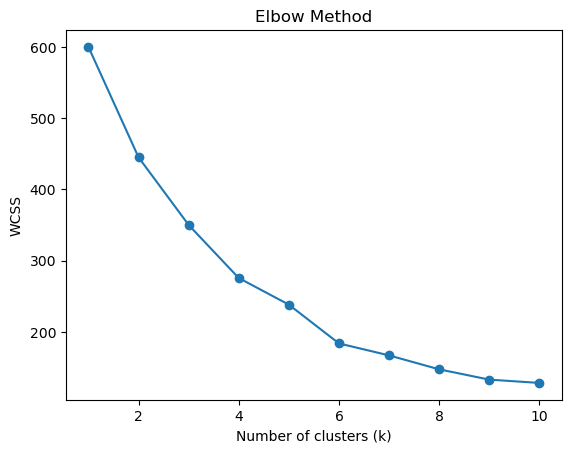

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.2476332096629319
Silhouette Score for k=3: 0.24949942269515069
Silhouette Score for k=4: 0.28073172614064335
Silhouette Score for k=5: 0.2591809264563791
Silhouette Score for k=6: 0.30806195525573643
Silhouette Score for k=7: 0.303754525785547
Silhouette Score for k=8: 0.310010627031084
Silhouette Score for k=9: 0.29248060415317334
Silhouette Score for k=10: 0.2810320595055193


C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [16]:
# Assume optimal k is 4 (change as per Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

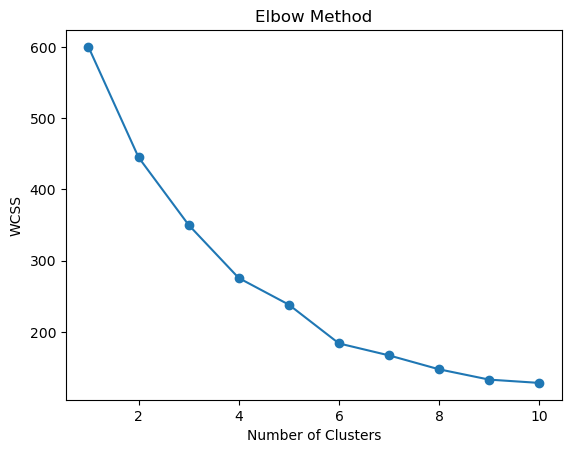

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
# Use optimal k (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()


C:\Users\Arihant\.khushi\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Customer ID,Age,Annual Income,Spending Score,Cluster
0,1,56,73053,58,1
1,2,69,36959,86,1
2,3,46,20530,49,2
3,4,32,18748,52,0
4,5,60,28545,42,2


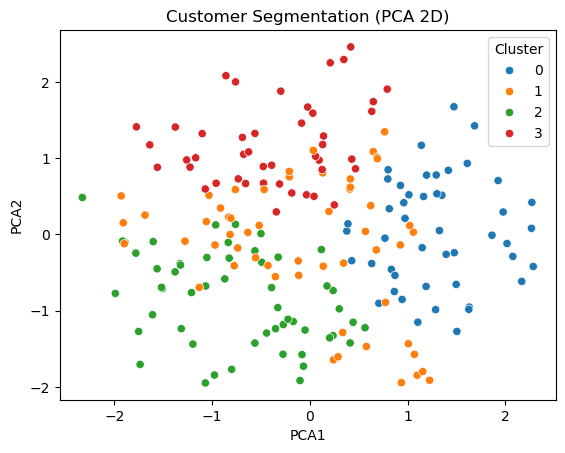

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("Customer Segmentation (PCA 2D)")
plt.show()


In [21]:
df.to_csv("customer_data_clustered.csv", index=False)
print("Clustered data saved successfully!")

Clustered data saved successfully!
